In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta, date
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Age_group


In [2]:
# read csv file from task1
df = pd.read_csv('merged_df.csv')
df

,Unnamed: 0,customer_id,first_name,last_name,gender,3y_bike_purchases,DOB,job_title,job_industry_category,wealth_segment,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,2017-12-23,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,2017-04-06,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,2017-05-11,True,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,2017-01-05,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,2017-02-21,False,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,19992,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,...,2017-01-09,True,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0
19993,19993,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,...,2017-02-16,False,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0
19994,19994,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,...,2017-08-08,False,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888.0
19995,19995,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,...,2017-01-11,False,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               19997 non-null  int64  
 1   customer_id              19997 non-null  int64  
 2   first_name               19997 non-null  object 
 3   last_name                19355 non-null  object 
 4   gender                   19997 non-null  object 
 5   3y_bike_purchases        19997 non-null  int64  
 6   DOB                      19551 non-null  object 
 7   job_title                17603 non-null  object 
 8   job_industry_category    16768 non-null  object 
 9   wealth_segment           19997 non-null  object 
 10  deceased_indicator       19997 non-null  object 
 11  owns_car                 19997 non-null  object 
 12  tenure                   19551 non-null  float64
 13  address                  19968 non-null  object 
 14  postcode              

In [4]:
ages =  pd.DataFrame(df["Age"])
ages

,Age
0,69.0
1,69.0
2,69.0
3,69.0
4,69.0
...,...
19992,55.0
19993,55.0
19994,55.0
19995,55.0


In [5]:
bins= [0,20,30,50,70,110]
labels = ['<20','20-30','30-50','50-70','>70']
ages['AgeGroup'] = pd.cut(ages['Age'], bins=bins, labels=labels, right=False)



In [6]:
extracted_col = ages["AgeGroup"]
df = df.join(extracted_col)


In [7]:
df = df.drop(['decade'], axis=1)
df

,Unnamed: 0,customer_id,first_name,last_name,gender,3y_bike_purchases,DOB,job_title,job_industry_category,wealth_segment,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,AgeGroup
0,0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,50-70
1,1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,50-70
2,2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,True,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,50-70
3,3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,50-70
4,4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,False,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,50-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,19992,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,...,True,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,50-70
19993,19993,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,...,False,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,50-70
19994,19994,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,...,False,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888.0,50-70
19995,19995,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,...,False,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,50-70


In [8]:
# Define the list_price and standard_cost variables
list_price = df['list_price']
standard_cost = df['standard_cost']

# Calculate the margin for the product
margin = list_price - standard_cost

# Determine if the product has a high margin
high_margin = margin >= (list_price * 0.5)

In [9]:
high_margin = pd.DataFrame(high_margin,columns=["high_margin"])

In [10]:
df = df.join(high_margin)

In [11]:
df

,Unnamed: 0,customer_id,first_name,last_name,gender,3y_bike_purchases,DOB,job_title,job_industry_category,wealth_segment,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,AgeGroup,high_margin
0,0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,50-70,False
1,1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,50-70,False
2,2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,50-70,False
3,3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,50-70,False
4,4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,...,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,50-70,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,19992,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,...,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,50-70,False
19993,19993,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,...,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,50-70,True
19994,19994,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,...,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888.0,50-70,False
19995,19995,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,...,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,50-70,False


<AxesSubplot:xlabel='high_margin', ylabel='count'>

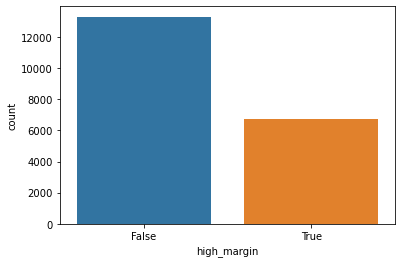

In [12]:
# Use the sns.countplot() function to plot the boolean column
sns.countplot(x="high_margin", data=df)

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

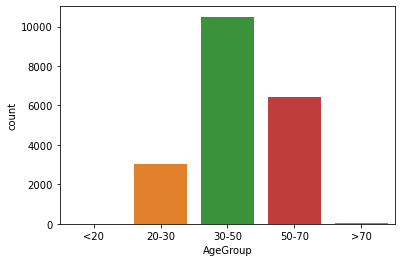

In [13]:
sns.countplot(x="AgeGroup", data=df)